# Statistical Analysis of Binary Biometric Embeddings

In this notebook, we analyze the statistical properties of binary biometric embeddings extracted from face images. We explore the distribution of Hamming weights, compute Hamming distances between different users, and evaluate system performance by calculating the False Acceptance Rate (FAR) and False Rejection Rate (FRR). These analyses help in understanding the discriminative power and robustness of the biometric system.


In [11]:
import numpy as np
from scipy.stats import norm
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from err_calc_npy import load_float_embeddings, binarize_all, generar_pares, calcular_distancias, evaluar_umbral, encontrar_eer
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [12]:
def epsilon(k, n, t):
    """
    Calculate the epsilon value based on the given parameters.
    
    Parameters:
    k (int): Code dimension.
    n (int): Code length.
    t (float): number of corrected errors.
    
    Returns:
    float: The calculated epsilon value.
    """
    if k > n or k < 0 or n <= 0:
        raise ValueError("Invalid values for k and n.")
    
    # Calculate epsilon using the formula
    p = (t/n)
    ϵ = -1 + k/n - p*np.log2(p) - (1 - p)*np.log2(1 - p)
    return ϵ
def gauss(x,mu, sigma):
    """
    Gaussian function for plotting.
    
    Parameters:
    x (array): Input values.
    mu (float): Mean of the Gaussian.
    sigma (float): Standard deviation of the Gaussian.
    a (float): Amplitude of the Gaussian.
    
    Returns:
    array: Gaussian values for the input x.
    """
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*((x-mu)/sigma)**2)
    

## Fully Random Binarization

In [13]:
def binarize(data_f: dict, thresholds: list):
    """
    Binarize the float embeddings based on a threshold.
    
    Parameters:
    data_f (dict): Dictionary containing float embeddings.
    threshold (float): Threshold for binarization.
    
    Returns:
    dict: Dictionary with binarized embeddings.
    """
    thresholds = np.sort(np.array(thresholds))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## with log2(n+1) bits like 0000, 0001, 0010, 0011, 0100, 0101, ...
    bin_length = int(np.ceil(np.log2(len(thresholds) + 1)))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## n as 0000, 0001, 0011, 0111, 1111
    # bin_length = int(np.ceil((len(thresholds) + 1)))
    data_b = {}
    for key, value in data_f.items():
        bin_indices = []
        for i in range(len(value)):
            interval_indices = np.searchsorted(thresholds, value[i], side='right')
            #print(np.array(list(np.binary_repr(interval_indices[4], width=bin_length)), dtype=int) )
            bin_index = np.concatenate([np.array(list(np.binary_repr(idx, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            # bin_index = np.concatenate([np.array(list(np.binary_repr(2**idx-1, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            bin_indices.append(bin_index.tolist())

        data_b[key] = np.stack(bin_indices, axis = 0)
    return data_b

Load Dataset

In [14]:
model = 512
float_dim = model

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [ ]:
# Load embeddings and binarize data

bits = 3 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

bits = 8 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed

bits = 16 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds16 = list(range(0, bin_length + 1))
fars16, frrs16 = evaluar_umbral(dist_g, dist_i, thresholds16)
eer_th16, eer_val16 = encontrar_eer(thresholds16, fars16, frrs16)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample16 = weights  # Use a sample for speed

Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 213766.94it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 208155.49it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 237405.33it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 214558.76it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/1237094306.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB

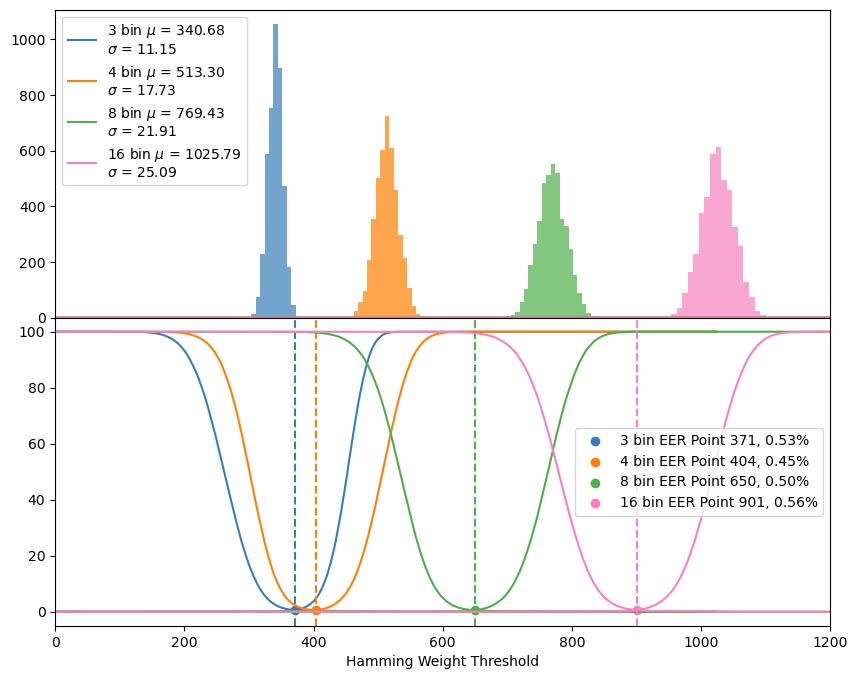

In [16]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(200, 400, 30), alpha=0.7, color=CB_color_cycle[0])
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(400, 600, 30), alpha=0.7, color = CB_color_cycle[1])
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[1], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(650, 850, 30), alpha=0.7, color = CB_color_cycle[2])
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[2], label=f"8 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

mu = np.mean(weights_sample16)
sigma = np.std(weights_sample16)
axs[0].hist(weights_sample16, bins=np.linspace(850, 1100, 30), alpha=0.7, color = CB_color_cycle[3])
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[3], label=f"16 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

axs[0].set_xlim(0, 1200)


axs[1].plot(thresholds3, fars3, color=CB_color_cycle[0])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[0])
axs[1].axvline(eer_th3, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[0], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[1])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[1])
axs[1].axvline(eer_th4, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[1], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[2])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[2])
axs[1].axvline(eer_th8, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[2], label='8 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].plot(thresholds16, fars16, color=CB_color_cycle[3])
axs[1].plot(thresholds16, frrs16, color=CB_color_cycle[3])
axs[1].axvline(eer_th16, color=CB_color_cycle[3], linestyle='--')
axs[1].scatter([eer_th16], [eer_val16], color=CB_color_cycle[3], label='16 bin EER Point '+f"{eer_th16}, {eer_val16:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')
axs[1].legend()
axs[1].set_xlim(0, 1200)

plt.show()



Notice that with 3 bins we only use 00, 01, 10. Hence 1 has smaller provability and smaller hamming weight. 

In [17]:
model = 128
float_dim = model

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [18]:
# Load embeddings and binarize data

bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]
print(thresholds)

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds2 = list(range(0, bin_length + 1))
fars2, frrs2 = evaluar_umbral(dist_g, dist_i, thresholds2)
eer_th2, eer_val2 = encontrar_eer(thresholds2, fars2, frrs2)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample2 = weights  # Use a sample for speed

bits = 3 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]
print(thresholds)


data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]
print(thresholds)


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed


bits = 8 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]
print(thresholds)


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed

[np.float64(-0.0003205921093467623)]
Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 245914.99it/s]


[np.float64(0.03775042798653112), np.float64(-0.03839161220522462)]
Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 250102.05it/s]


[np.float64(0.059296044394030474), np.float64(-0.0003205921093467623), np.float64(-0.059937228612724)]
Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 241162.83it/s]


[np.float64(0.10135621000932848), np.float64(0.059296044394030474), np.float64(0.02784322673535631), np.float64(-0.0003205921093467623), np.float64(-0.028484410954049834), np.float64(-0.059937228612724), np.float64(-0.10199739422802201)]
Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 265147.12it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/1485098946.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB

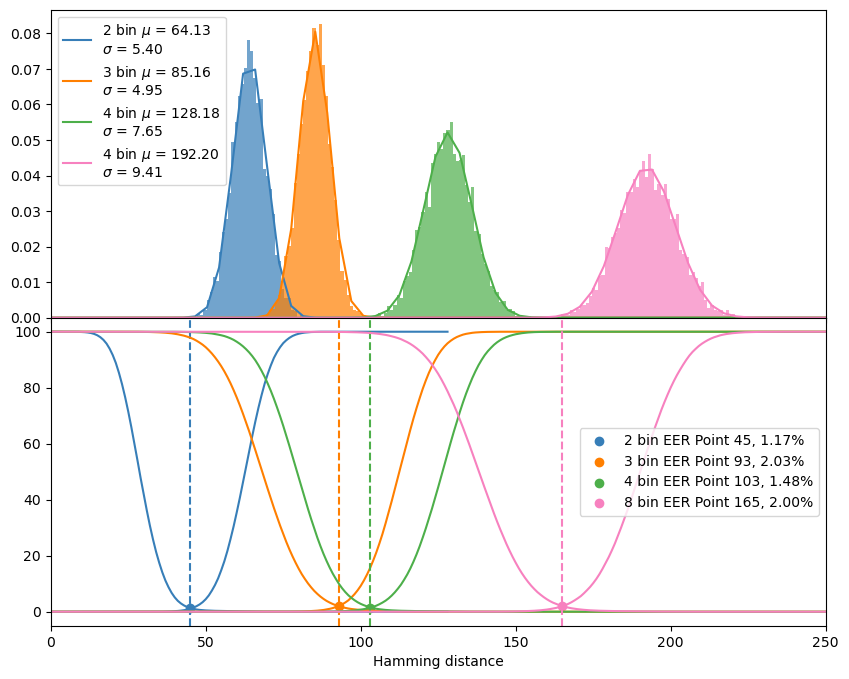

In [19]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample2)
sigma = np.std(weights_sample2)
axs[0].hist(weights_sample2, bins=np.linspace(0, 200, 200), alpha=0.7, color=CB_color_cycle[0], density=True)
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[0], label=f"2 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
#################################
mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(0, 200, 200), alpha=0.7, color=CB_color_cycle[1], density=True)
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[1], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
#################################
mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(00, 200, 200), alpha=0.7, color = CB_color_cycle[2], density=True)
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[2], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
#################################
mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(50, 250, 200), alpha=0.7, color = CB_color_cycle[3], density=True)
axs[0].plot(np.linspace(0, bin_length, 100), gauss(np.linspace(0, bin_length, 100), mu, sigma), color=CB_color_cycle[3], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

axs[0].set_xlim(0, 250)
axs[0].legend()


axs[1].plot(thresholds2, fars2, color=CB_color_cycle[0])
axs[1].plot(thresholds2, frrs2, color=CB_color_cycle[0])
axs[1].axvline(eer_th2, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th2], [eer_val2], color=CB_color_cycle[0], label='2 bin EER Point '+f"{eer_th2}, {eer_val2:.2f}%")
axs[1].plot(thresholds3, fars3, color=CB_color_cycle[1])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[1])
axs[1].axvline(eer_th3, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[1], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[2])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[2])
axs[1].axvline(eer_th4, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[2], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[3])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[3])
axs[1].axvline(eer_th8, color=CB_color_cycle[3], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[3], label='8 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')

plt.legend()

plt.xlabel("Hamming distance")
plt.show()


## Carlos' method

In [20]:
def binarize(data_f: dict, thresholds: list):
    """
    Binarize the float embeddings based on a threshold.
    
    Parameters:
    data_f (dict): Dictionary containing float embeddings.
    threshold (float): Threshold for binarization.
    
    Returns:
    dict: Dictionary with binarized embeddings.
    """
    thresholds = np.sort(np.array(thresholds))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## with log2(n+1) bits like 0000, 0001, 0010, 0011, 0100, 0101, ...
    #bin_length = int(np.ceil(np.log2(len(thresholds) + 1)))
    bin_length = int((len(thresholds) + 1))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## n as 0000, 0001, 0011, 0111, 1111
    # bin_length = int(np.ceil((len(thresholds) + 1)))
    data_b = {}
    for key, value in data_f.items():
        bin_indices = []
        for i in range(len(value)):
            interval_indices = np.searchsorted(thresholds, value[i], side='right')
            #print(np.array(list(np.binary_repr(interval_indices[4], width=bin_length)), dtype=int) )
            # bin_index = np.concatenate([np.array(list(np.binary_repr(idx, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            bin_index = np.concatenate([np.array(list(np.binary_repr(2**idx-1, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            bin_indices.append(bin_index.tolist())

        data_b[key] = np.stack(bin_indices, axis = 0)
    return data_b

In [35]:
# Load embeddings and binarize data
model = 512
float_dim = model
dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [36]:


bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 3 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 231156.46it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 249347.78it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 237124.14it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/2664639669.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_71792/2664639669.py:8: SyntaxWarning: invalid escape sequence '\s'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 

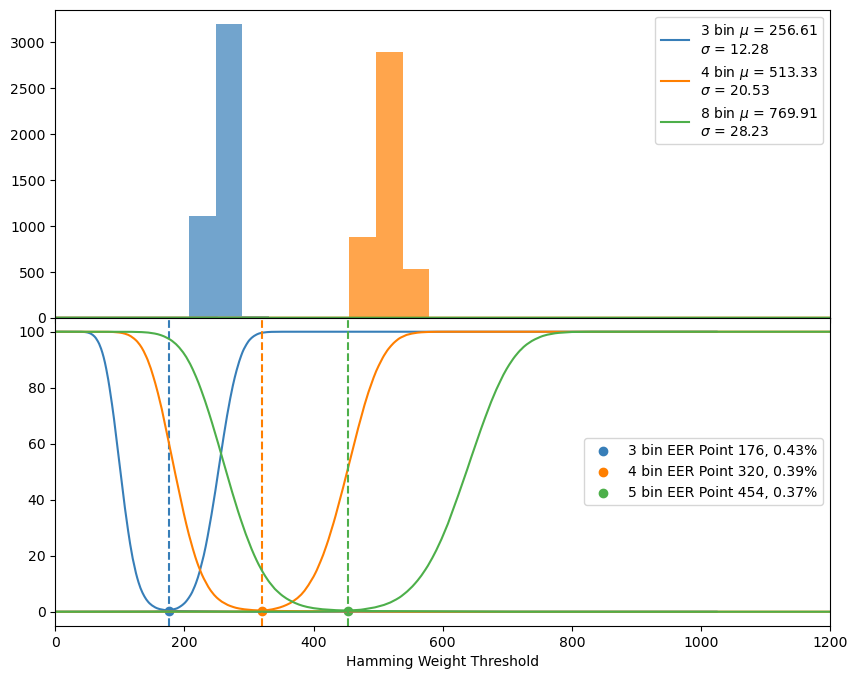

In [37]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(0, 1200, 30), alpha=0.7, color=CB_color_cycle[0])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(0, 1200, 30), alpha=0.7, color = CB_color_cycle[1])
axs[0].plot(np.linspace(0, 1200, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[1], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[2])
axs[0].plot(np.linspace(0, 1200, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[2], label=f"8 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

axs[0].set_xlim(0, 1200)


axs[1].plot(thresholds3, fars3, color=CB_color_cycle[0])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[0])
axs[1].axvline(eer_th3, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[0], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[1])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[1])
axs[1].axvline(eer_th4, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[1], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[2])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[2])
axs[1].axvline(eer_th8, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[2], label='5 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')
axs[1].legend()
axs[1].set_xlim(0, 1200)

plt.show()

In [32]:
# Load embeddings and binarize data
model = 128
float_dim = model
dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [ ]:


bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 3 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 235911.26it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 205030.66it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 207166.84it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/3848111059.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_71792/3848111059.py:8: SyntaxWarning: invalid escape sequence '\s'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 2

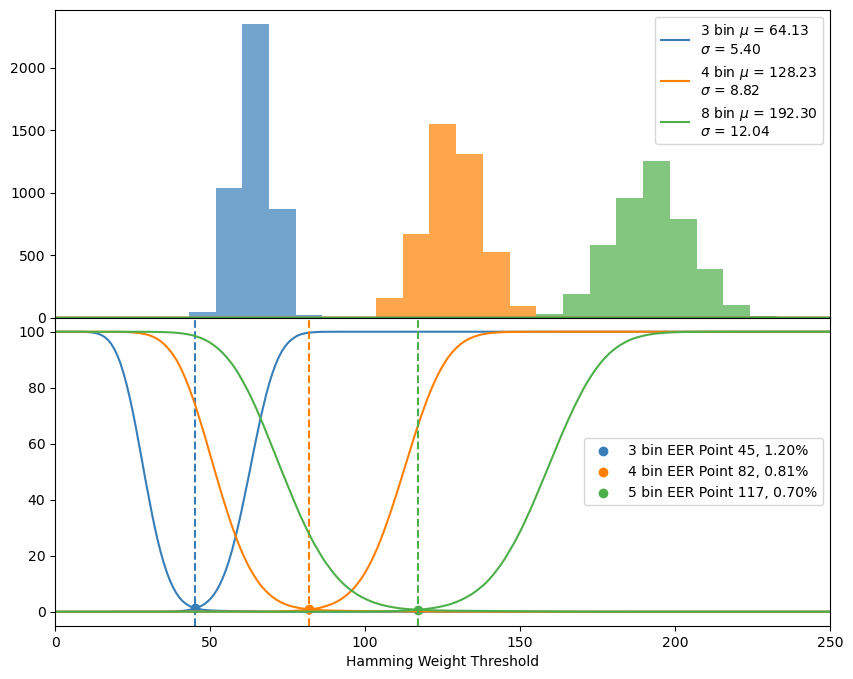

In [34]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(0, 250, 30), alpha=0.7, color=CB_color_cycle[0])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[1])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[1], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[2])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[2], label=f"8 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

axs[0].set_xlim(0, 200)


axs[1].plot(thresholds3, fars3, color=CB_color_cycle[0])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[0])
axs[1].axvline(eer_th3, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[0], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[1])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[1])
axs[1].axvline(eer_th4, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[1], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[2])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[2])
axs[1].axvline(eer_th8, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[2], label='5 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')
axs[1].legend()
axs[1].set_xlim(0, 250)

plt.show()

## Gray Binarization

In [ ]:
def binary_to_gray(n):
    return n ^ (n >> 1)

0 1 3 2 6 7 5 4 12 13


In [39]:
def binarize(data_f: dict, thresholds: list):
    """
    Binarize the float embeddings based on a threshold.
    
    Parameters:
    data_f (dict): Dictionary containing float embeddings.
    threshold (float): Threshold for binarization.
    
    Returns:
    dict: Dictionary with binarized embeddings.
    """
    thresholds = np.sort(np.array(thresholds))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## with log2(n+1) bits like 0000, 0001, 0010, 0011, 0100, 0101, ...
    bin_length = int(np.ceil(np.log2(len(thresholds) + 1)))
    #bin_length = int((len(thresholds) + 1))
    ## If thresholds s [x1, x2, ..., xn], we will have n+1 positions to binarize, we can express in binary
    ## n as 0000, 0001, 0011, 0111, 1111
    # bin_length = int(np.ceil((len(thresholds) + 1)))
    data_b = {}
    for key, value in data_f.items():
        bin_indices = []
        for i in range(len(value)):
            interval_indices = np.searchsorted(thresholds, value[i], side='right')
            #print(np.array(list(np.binary_repr(interval_indices[4], width=bin_length)), dtype=int) )
            # Use Gray code instead of normal binary code
            
            bin_index = np.concatenate([
                np.array(list(np.binary_repr(binary_to_gray(idx), width=bin_length)), dtype=int)
                for idx in interval_indices
            ], axis=0)
            # bin_index = np.concatenate([np.array(list(np.binary_repr(2**idx-1, width=bin_length)), dtype=int) for idx in interval_indices], axis =0 )
            bin_indices.append(bin_index.tolist())

        data_b[key] = np.stack(bin_indices, axis = 0)
    return data_b

In [44]:
model = 512
float_dim = model
dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)

In [45]:


bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 3 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 257185.78it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 238642.76it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 257767.11it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/2498631509.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_71792/2498631509.py:8: SyntaxWarning: invalid escape sequence '\s'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 

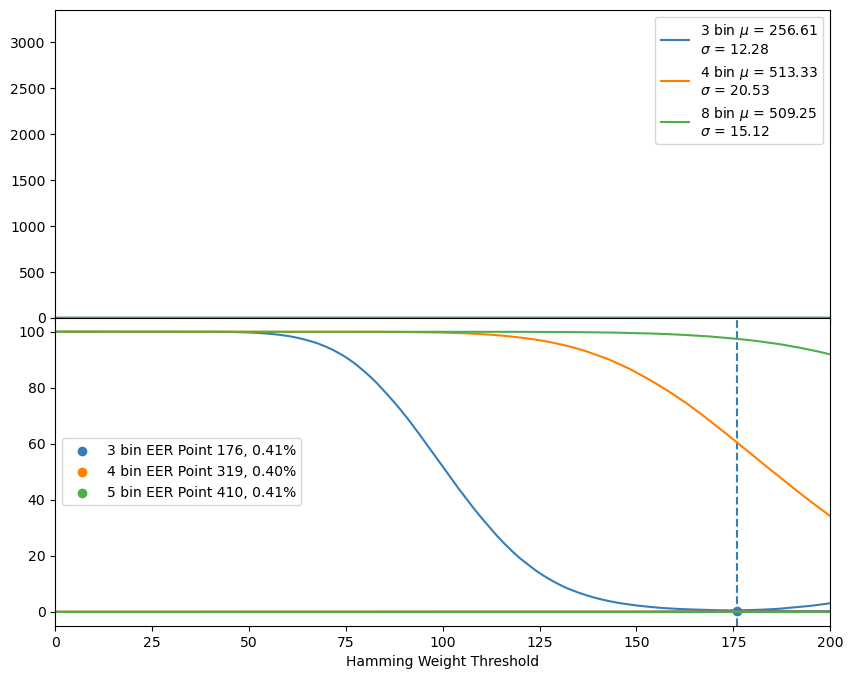

In [46]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(0, 1200, 30), alpha=0.7, color=CB_color_cycle[0])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(0, 1200, 30), alpha=0.7, color = CB_color_cycle[1])
axs[0].plot(np.linspace(0, 1200, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[1], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[2])
axs[0].plot(np.linspace(0, 1200, 100), gauss(np.linspace(0, 1200, 100), mu, sigma), color=CB_color_cycle[2], label=f"8 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

axs[0].set_xlim(0, 1200)


axs[1].plot(thresholds3, fars3, color=CB_color_cycle[0])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[0])
axs[1].axvline(eer_th3, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[0], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[1])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[1])
axs[1].axvline(eer_th4, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[1], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[2])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[2])
axs[1].axvline(eer_th8, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[2], label='5 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')
axs[1].legend()
axs[1].set_xlim(0, 200)

plt.show()

In [42]:

# Load embeddings and binarize data
model = 128
float_dim = model
dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for _, mat in data_f.items():
    lista.append(np.concatenate(mat, axis = 0))
lista = np.concatenate(lista, axis = 0)

#plt.hist(np.concatenate(lista, axis = 0), bins=100)
mu = np.mean(lista)
sigma = np.std(lista)
bits = 2 #means we are spliting in 2^bits-1 parts
thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]

data_b = binarize(data_f, thresholds) # Takes 4 secs approx

genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds3 = list(range(0, bin_length + 1))
fars3, frrs3 = evaluar_umbral(dist_g, dist_i, thresholds3)
eer_th3, eer_val3 = encontrar_eer(thresholds3, fars3, frrs3)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample3 = weights  # Use a sample for speed


bits = 3 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds4 = list(range(0, bin_length + 1))
fars4, frrs4 = evaluar_umbral(dist_g, dist_i, thresholds4)
eer_th4, eer_val4 = encontrar_eer(thresholds4, fars4, frrs4)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample4 = weights  # Use a sample for speed

bits = 4 #3 or 4

thresholds = [norm.ppf(1-1/(bits)*i)*sigma+mu for i in range(1, bits)]


data_b = binarize(data_f, thresholds) # Takes 4 secs approx
genuinos, impostores = generar_pares(data_b)
dist_g = calcular_distancias(genuinos)
dist_i = calcular_distancias(impostores)


bin_length = next(iter(data_b.values())).shape[1]
thresholds8 = list(range(0, bin_length + 1))
fars8, frrs8 = evaluar_umbral(dist_g, dist_i, thresholds8)
eer_th8, eer_val8 = encontrar_eer(thresholds8, fars8, frrs8)


weights = [int(arr[0].sum()) for arr in data_b.values()]
weights_sample8 = weights  # Use a sample for speed


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 247824.54it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 254015.50it/s]


Personas seleccionadas para pares genuinos: 1272


Generando pares impostores: 100%|██████████| 100000/100000 [00:00<00:00, 243493.47it/s]


<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_71792/3848111059.py:8: SyntaxWarning: invalid escape sequence '\m'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
/tmp/ipykernel_71792/3848111059.py:8: SyntaxWarning: invalid escape sequence '\s'
  axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 2

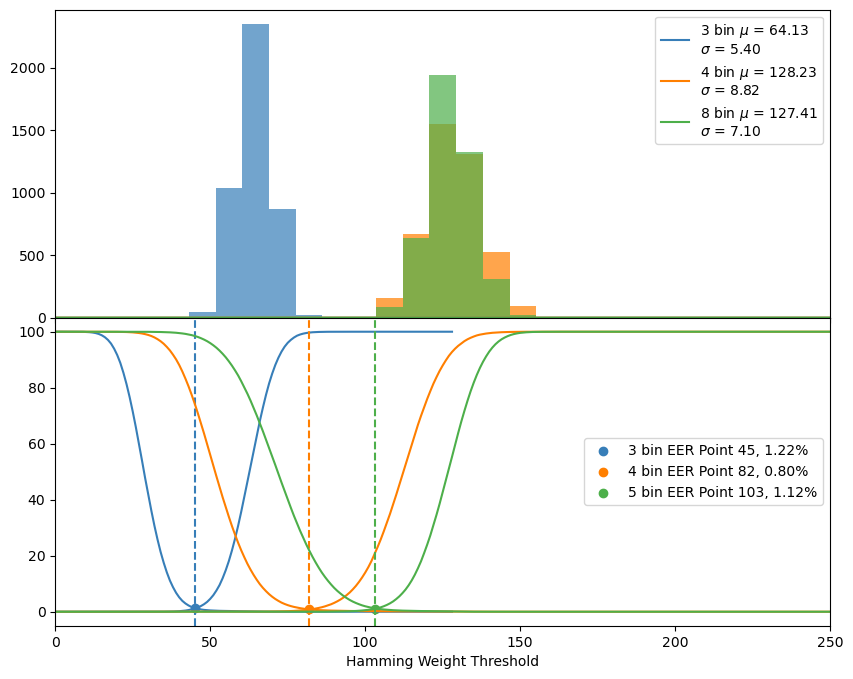

In [43]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

mu = np.mean(weights_sample3)
sigma = np.std(weights_sample3)
axs[0].hist(weights_sample3, bins=np.linspace(0, 250, 30), alpha=0.7, color=CB_color_cycle[0])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[0], label=f"3 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample4)
sigma = np.std(weights_sample4)
axs[0].hist(weights_sample4, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[1])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[1], label=f"4 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")

mu = np.mean(weights_sample8)
sigma = np.std(weights_sample8)
axs[0].hist(weights_sample8, bins=np.linspace(0, 250, 30), alpha=0.7, color = CB_color_cycle[2])
axs[0].plot(np.linspace(0, 250, 100), gauss(np.linspace(0, 250, 100), mu, sigma), color=CB_color_cycle[2], label=f"8 bin $\mu$ = {mu:.2f}\n$\sigma$ = {sigma:.2f}")
axs[0].legend()

axs[0].set_xlim(0, 200)


axs[1].plot(thresholds3, fars3, color=CB_color_cycle[0])
axs[1].plot(thresholds3, frrs3, color=CB_color_cycle[0])
axs[1].axvline(eer_th3, color=CB_color_cycle[0], linestyle='--')
axs[1].scatter([eer_th3], [eer_val3], color=CB_color_cycle[0], label='3 bin EER Point '+f"{eer_th3}, {eer_val3:.2f}%")
axs[1].plot(thresholds4, fars4, color=CB_color_cycle[1])
axs[1].plot(thresholds4, frrs4, color=CB_color_cycle[1])
axs[1].axvline(eer_th4, color=CB_color_cycle[1], linestyle='--')
axs[1].scatter([eer_th4], [eer_val4], color=CB_color_cycle[1], label='4 bin EER Point '+f"{eer_th4}, {eer_val4:.2f}%")
axs[1].plot(thresholds8, fars8, color=CB_color_cycle[2])
axs[1].plot(thresholds8, frrs8, color=CB_color_cycle[2])
axs[1].axvline(eer_th8, color=CB_color_cycle[2], linestyle='--')
axs[1].scatter([eer_th8], [eer_val8], color=CB_color_cycle[2], label='5 bin EER Point '+f"{eer_th8}, {eer_val8:.2f}%")
axs[1].set_xlabel('Hamming Weight Threshold')
axs[1].legend()
axs[1].set_xlim(0, 250)

plt.show()

## Deeper Statistical analysis
Till now we are assuming every every float in the embeddings have the same statistical properties (they follow the same normal distribution). In this section we will analyse a bit more in depth these assuptions.

In [53]:
import random
model = 512
float_dim = model

dataset_dir = f"./embeddings{model}_float_LFW"
data_f = load_float_embeddings(dataset_dir, float_dim)

lista = []
for person in data_f.keys():
    lista.append(data_f[person][random.randint(0, data_f[person].shape[0] - 1)])
lista = np.array(lista)


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_969/1825985651.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.title("$\mu$ distrution of each embedding float")
/tmp/ipykernel_969/1825985651.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sigma$ distrution of each embedding float")


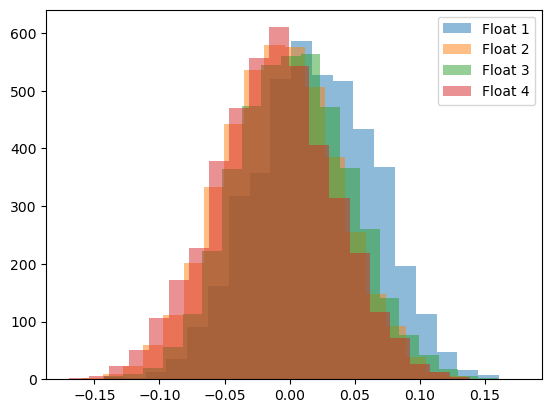

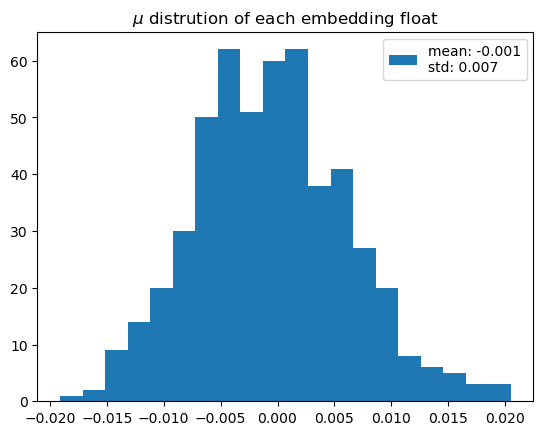

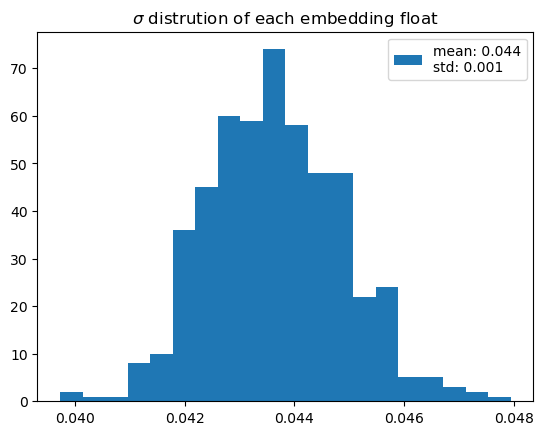

In [55]:
for i in range(4):
    plt.hist(lista[:,i], alpha = 0.5, bins = 20, label =f"Float {i+1}")
plt.legend()
plt.show()
mean_float = []
std_float = []
for i in range(model):
    mean_float.append(np.mean(lista[:,i]))
    std_float.append(np.std(lista[:,i]))

plt.hist(mean_float, bins = 20, label =f"mean: {np.mean(mean_float):.3f}\nstd: {np.std(mean_float):.3f}")
plt.title("$\mu$ distrution of each embedding float")
plt.legend()
plt.show()
plt.hist(std_float, bins = 20, label =f"mean: {np.mean(std_float):.3f}\nstd: {np.std(std_float):.3f}")
plt.title("$\sigma$ distrution of each embedding float")
plt.legend()
plt.show()

Deviation from equipobable. We are assuming mean is the mean of every float and the same for std. We will se how far this is for every bit.

In [70]:
bits = 3
std_values = np.linspace(0.044-0.005, 0.044+0.005, 50)
mean_values = np.linspace(-0.007, 0.007, 50)
difference = np.zeros((50, 50))
std = np.std(lista)
mean = np.mean(lista)
for i in range(50):
    for j in range(50):
        difference[i, j] = norm.cdf(norm.ppf(1-1/3)*std_values[i] + mean_values[j]) - norm.cdf(norm.ppf(1-1/3)*std +mean)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_6471/907010043.py:3: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$ Mean")
/tmp/ipykernel_6471/907010043.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$ Std")


Text(0, 0.5, '$\\Delta$ Std')

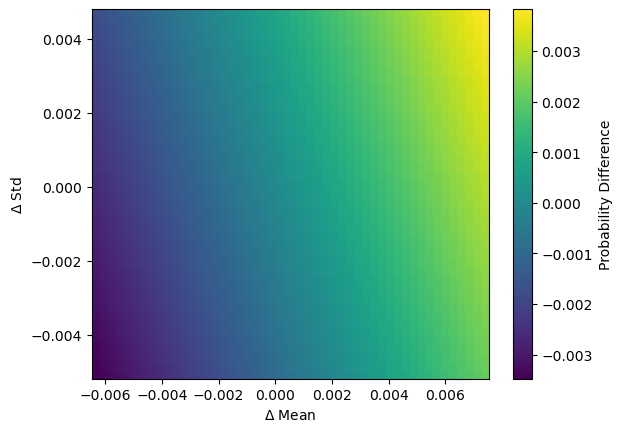

In [77]:
plt.imshow(difference, extent=(mean_values[0]-mean, mean_values[-1]-mean, std_values[0]-std, std_values[-1]-std), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Probability Difference')
plt.xlabel("$\Delta$ Mean")
plt.ylabel("$\Delta$ Std")

this shows how, as we increase the estimated mean, how the probability of the last "equiprobable" region increses.